# **Lending Club Loan Data Analysis_Project 2** 

***DESCRIPTION:***

Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement: ** 

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Domain: Finance**

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

**Content: **

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

**Tasks:**

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/DL_project2.zip

Archive:  /content/drive/MyDrive/DL_project2.zip
  inflating: output.csv              
  inflating: loan_data.csv           
  inflating: input.csv               


In [6]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.head().T

,0,1,2,3,4
credit.policy,1,1,1,1,1
purpose,debt_consolidation,credit_card,debt_consolidation,debt_consolidation,credit_card
int.rate,0.1189,0.1071,0.1357,0.1008,0.1426
installment,829.1,228.22,366.86,162.34,102.92
log.annual.inc,11.350407,11.082143,10.373491,11.350407,11.299732
dti,19.48,14.29,11.63,8.1,14.97
fico,737,707,682,712,667
days.with.cr.line,5639.958333,2760.0,4710.0,2699.958333,4066.0
revol.bal,28854,33623,3511,33667,4740
revol.util,52.1,76.7,25.6,73.2,39.5


In [7]:
loan_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

**1.Feature Transformation**

In [8]:
encoded_df = pd.get_dummies(loan_df,drop_first=False)
encoded_df.head().T

,0,1,2,3,4
credit.policy,1.000000,1.000000,1.000000,1.000000,1.000000
int.rate,0.118900,0.107100,0.135700,0.100800,0.142600
installment,829.100000,228.220000,366.860000,162.340000,102.920000
log.annual.inc,11.350407,11.082143,10.373491,11.350407,11.299732
dti,19.480000,14.290000,11.630000,8.100000,14.970000
fico,737.000000,707.000000,682.000000,712.000000,667.000000
days.with.cr.line,5639.958333,2760.000000,4710.000000,2699.958333,4066.000000
revol.bal,28854.000000,33623.000000,3511.000000,33667.000000,4740.000000
revol.util,52.100000,76.700000,25.600000,73.200000,39.500000
inq.last.6mths,0.000000,0.000000,1.000000,1.000000,0.000000


**2.Exploratory data analysis of different factors of the dataset**

In [9]:
#Checking for Null values
encoded_df.isnull().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

There are no Values for any column in the dataset

In [10]:
encoded_df.shape

(9578, 20)

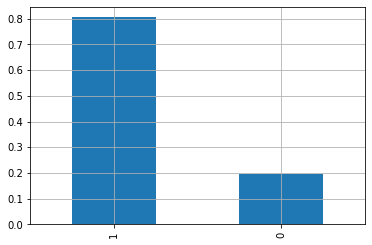

In [16]:
encoded_df['credit.policy'].value_counts(normalize=True).plot(kind='bar',
                                                              grid =True);                                        

The above plot shows that the dataset is highly imbalanced.Almost 80:20 ratio

One can do the data balancing by downsampling majority samples('1' here) or upsampling using sklearn.utils.resample() or by imblearn.over_sampling.SMOTE().

Downsampling creates loss of information.Hence i prefer upsampling.

<!-- However iam not doing any data balancing and try to predict the sensitivity of the model.  -->

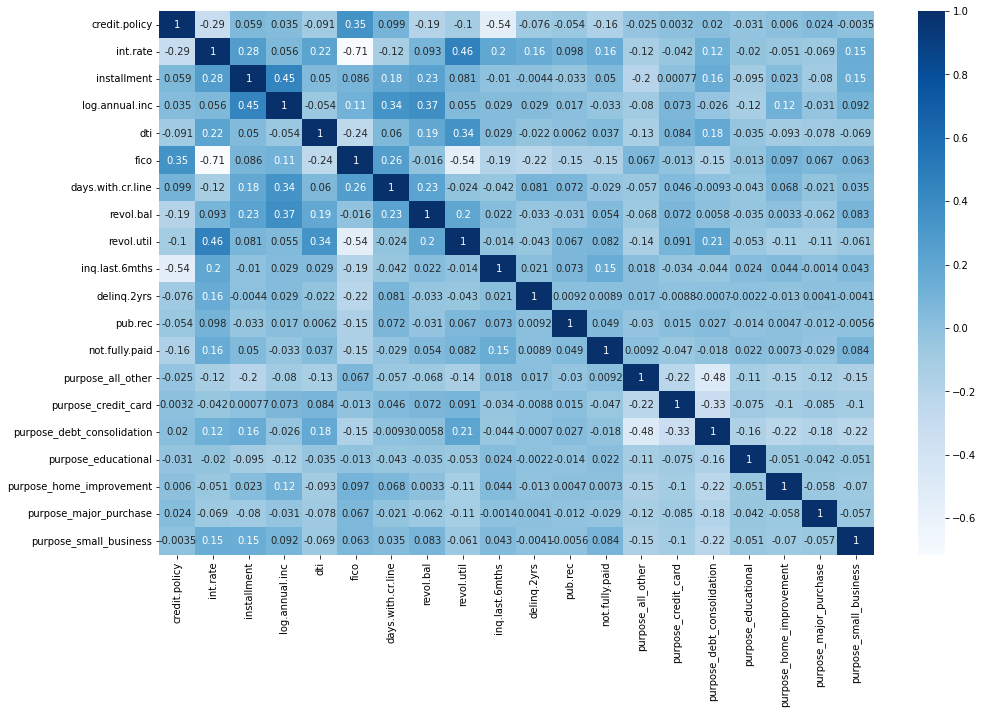

In [17]:
#Checking the auto correlation of variable
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(encoded_df.corr(),cbar=True,annot=True,cmap='Blues');

**Feature Engineering**

From above Heatmap it is clear that the maximum positive correlation is 0.46 which means not so strong correlation.

Also the maximum Negative correlation is -0.76 between 'fico(credit score)' and 'int_rate(Interest rate)' which is a good negative correlation, as credit score is inversely related to interest rate.hence i decided to drop the feature credit score i.e. column 'fico'.


In [18]:
#dropping the column 'fico'

loan_df_final = encoded_df.drop('fico',axis=1)

In [30]:
X = loan_df_final.drop('credit.policy',axis=1)
y = loan_df_final['credit.policy']

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X,y,
                                                  test_size=0.25,
                                                  stratify=y,
                                                  random_state = 101
                                                  )

In [32]:
X_train.shape,X_test.shape

((7183, 18), (2395, 18))

In [33]:
y_train.shape,y_test.shape

((7183,), (2395,))

In [35]:
y_train.value_counts()

1    5782
0    1401
Name: credit.policy, dtype: int64

**Apply scaling to the data**

In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max_obj = MinMaxScaler()

In [37]:
X_train_scaled = min_max_obj.fit_transform(X_train)
X_test_scaled = min_max_obj.transform(X_test)

Converting Test,Train data into array form

In [38]:
y_train_arr = np.asarray(y_train).astype(int)
y_test_arr = np.asarray(y_test).astype(int)

**Building a Neural network model for Binary classification.**
1.Calculate Confusion Matrix and f_score
2.Calculate AUC (Area Under Curve) of Receiver Operating Characteristics (ROC) curve.

I will Create Two deep Learning Models with Two different techniques for improving the above two metrics for the given imbalance DataSet.
**Model1:** 
Using class_weigh technique to add higher weighatge to minority class.For this iam used sklearn.utils.class_weight.compute_class_weight() function.

**Model2:**
Using SMOTE for Upsampling the train data and then testing the model on 


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Input

In [61]:
model = Sequential()
model.add(Input(shape=(18,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(240,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.FalsePositives()]
              )

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 120)               2280      
                                                                 
 dense_11 (Dense)            (None, 240)               29040     
                                                                 
 dropout_2 (Dropout)         (None, 240)               0         
                                                                 
 dense_12 (Dense)            (None, 240)               57840     
                                                                 
 dense_13 (Dense)            (None, 120)               28920     
                                                                 
 dense_14 (Dense)            (None, 1)                 121       
                                                                 
Total params: 118,201
Trainable params: 118,201
Non-tr

In [114]:
#early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                      verbose=1, patience=30)
#Class_weights

from sklearn.utils.class_weight import compute_class_weight

class_wghts = dict(zip(np.unique(y_train), 
                       compute_class_weight('balanced', 
                                            classes=np.unique(y_train), 
                                           y= y_train))) 
type(class_wghts)

training_history = model.fit(X_train_scaled,y_train_arr,epochs =100,
                             validation_data=(X_test_scaled,y_test_arr),
                             class_weight = class_wghts,
                             callbacks = [es]
                           )

Epoch 1/100
225/225 [==============================] - 4s 11ms/step - loss: 0.7243 - binary_accuracy: 0.3712 - false_negatives_1: 4141.0000 - false_positives_1: 376.0000 - val_loss: 0.7370 - val_binary_accuracy: 0.2271 - val_false_negatives_1: 1848.0000 - val_false_positives_1: 3.0000
Epoch 2/100
225/225 [==============================] - 2s 10ms/step - loss: 0.5706 - binary_accuracy: 0.6499 - false_negatives_1: 2205.0000 - false_positives_1: 310.0000 - val_loss: 0.4276 - val_binary_accuracy: 0.8121 - val_false_negatives_1: 313.0000 - val_false_positives_1: 137.0000
Epoch 3/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4393 - binary_accuracy: 0.8061 - false_negatives_1: 1101.0000 - false_positives_1: 292.0000 - val_loss: 0.5108 - val_binary_accuracy: 0.7336 - val_false_negatives_1: 558.0000 - val_false_positives_1: 80.0000
Epoch 4/100
225/225 [==============================] - 1s 5ms/step - loss: 0.4144 - binary_accuracy: 0.8224 - false_negatives_1: 974.0000 - fa

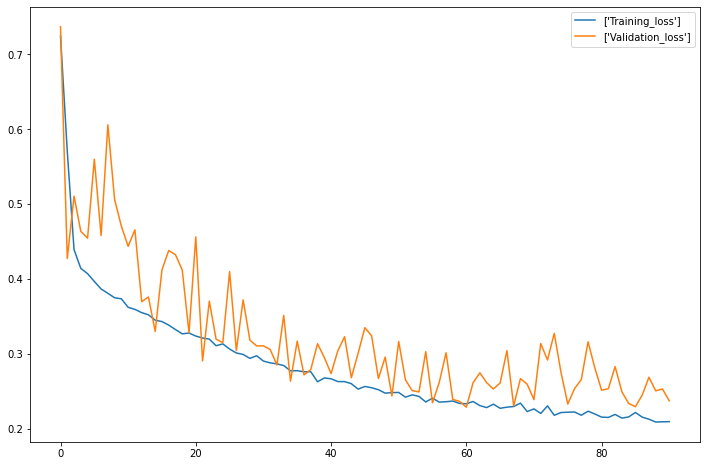

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize =(12,8))

plt.plot(training_history.history['loss'],label = ['Training_loss'])
plt.plot(training_history.history['val_loss'],label = ['Validation_loss'])

plt.legend()
plt.show()

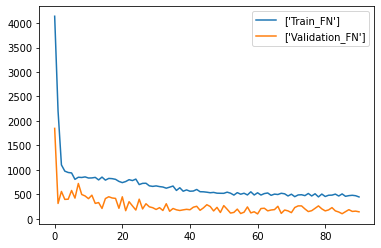

In [116]:
plt.plot(training_history.history['false_negatives_1'],label = ['Train_FN'])
plt.plot(training_history.history['val_false_negatives_1'],label = ['Validation_FN'])

plt.legend()
plt.show()

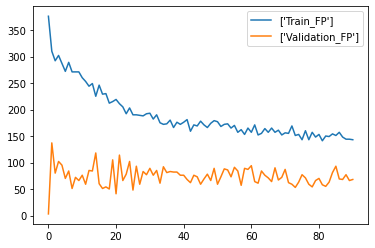

In [117]:
plt.plot(training_history.history['false_positives_1'],label = ['Train_FP'])
plt.plot(training_history.history['val_false_positives_1'],label = ['Validation_FP'])

plt.legend()
plt.show()

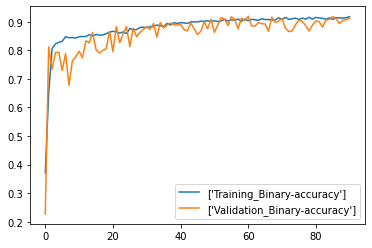

In [118]:
plt.plot(training_history.history['binary_accuracy'],label = ['Training_Binary-accuracy'])
plt.plot(training_history.history['val_binary_accuracy'],label = ['Validation_Binary-accuracy'])

plt.legend()
plt.show()

In [119]:
y_train_pred = (model.predict(X_train_scaled)>0.5).astype(int)
y_test_pred = (model.predict(X_test_scaled)>0.5).astype(int)

In [120]:
pd.DataFrame(y_train_pred).value_counts()

1    5586
0    1597
dtype: int64

In [121]:
y_train.value_counts()

1    5782
0    1401
Name: credit.policy, dtype: int64

the class_weight methods given higher wiegtage to '0' and hence predictions of target='0' coming higher

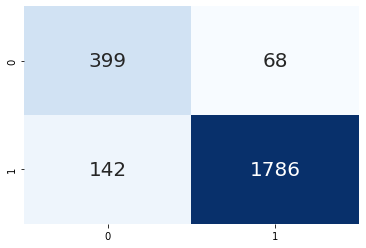

In [122]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,cmap='Blues',cbar=False,annot_kws={"size": 20},
            fmt='g');

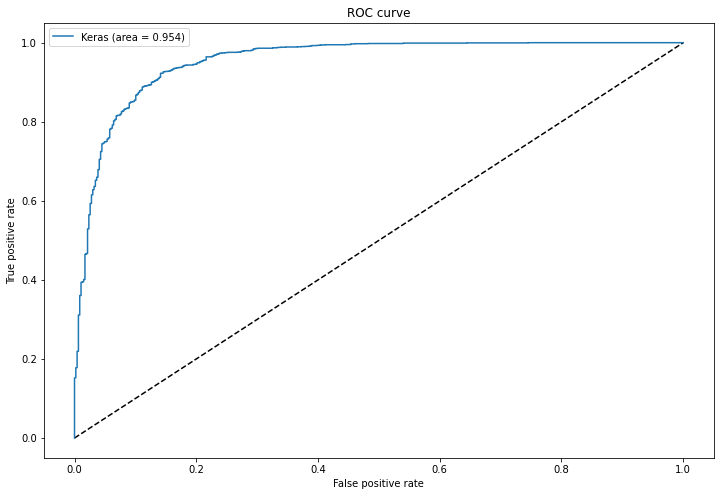

In [123]:
#plotting area ROC(Reciever Pperating Characteristics) curve

from sklearn.metrics import roc_curve
y_test_pred = model.predict(X_test_scaled).ravel()
FPR, TPR, threshold = roc_curve(y_test_arr, y_test_pred)

from sklearn.metrics import auc
area_under_curve = auc(FPR, TPR)
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR, label='Keras (area = {:.3f})'.format(area_under_curve))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


AUC score of the model is 0.5 which is very bad.We need to imporove this.
class_weight function not improving AUC

## *SMOTE - Synthetic Minority Oversampling technique*
SMOTE is applied for upsampling of minority classes.
Iam using SMOTE to generate minority samples from X_train+y_train and then use this data for model and then the model tested for X_test/y_test data

In [87]:
from imblearn.over_sampling import SMOTE

In [95]:
smt = SMOTE(sampling_strategy='auto', random_state=101, k_neighbors=5)
X_train_smt,y_train_smt = smt.fit_resample(X_train,y_train)

from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_smt))


Original dataset shape Counter({1: 5782, 0: 1401})
Resampled dataset shape Counter({1: 5782, 0: 5782})


In [96]:
from sklearn.preprocessing import MinMaxScaler
min_max_obj = MinMaxScaler()

#Scaling
X_train_smt_scaled = min_max_obj.fit_transform(X_train_smt)
X_test_1_scaled = min_max_obj.transform(X_test)

#Iam using original split data(X_test,y_test) for testing & 
#SMOTE data for training

#y_train,y_test to array
y_train_smt_arr = np.asarray(y_train_smt).astype(int)
y_test_1_arr = np.asarray(y_test).astype(int)

In [97]:
smt_model = Sequential()
smt_model.add(Input(shape=(18,)))
smt_model.add(Dense(120,activation='relu'))
smt_model.add(Dense(240,activation='relu'))
smt_model.add(Dropout(0.4))
smt_model.add(Dense(240,activation='relu'))
smt_model.add(Dense(120,activation='relu'))
smt_model.add(Dense(1,activation='sigmoid'))
smt_model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.FalsePositives()]
              )
smt_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 120)               2280      
                                                                 
 dense_16 (Dense)            (None, 240)               29040     
                                                                 
 dropout_3 (Dropout)         (None, 240)               0         
                                                                 
 dense_17 (Dense)            (None, 240)               57840     
                                                                 
 dense_18 (Dense)            (None, 120)               28920     
                                                                 
 dense_19 (Dense)            (None, 1)                 121       
                                                                 
Total params: 118,201
Trainable params: 118,201
Non-tr

In [100]:
#early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', 
                                      verbose=1, patience=20)
smt_training_history = smt_model.fit(X_train_smt_scaled,y_train_smt_arr,
                                     epochs =100,
                                     validation_data=(X_test_1_scaled,
                                                      y_test_1_arr),
                                     callbacks=[es]
                                    )

Epoch 1/100
362/362 [==============================] - 3s 6ms/step - loss: 0.3559 - binary_accuracy: 0.8333 - false_negatives_2: 596.0000 - false_positives_2: 1332.0000 - val_loss: 0.3244 - val_binary_accuracy: 0.8706 - val_false_negatives_2: 106.0000 - val_false_positives_2: 204.0000
Epoch 2/100
362/362 [==============================] - 2s 4ms/step - loss: 0.2599 - binary_accuracy: 0.8859 - false_negatives_2: 432.0000 - false_positives_2: 887.0000 - val_loss: 0.3393 - val_binary_accuracy: 0.8593 - val_false_negatives_2: 200.0000 - val_false_positives_2: 137.0000
Epoch 3/100
362/362 [==============================] - 2s 5ms/step - loss: 0.2451 - binary_accuracy: 0.8942 - false_negatives_2: 420.0000 - false_positives_2: 803.0000 - val_loss: 0.3090 - val_binary_accuracy: 0.8752 - val_false_negatives_2: 142.0000 - val_false_positives_2: 157.0000
Epoch 4/100
362/362 [==============================] - 2s 5ms/step - loss: 0.2374 - binary_accuracy: 0.8942 - false_negatives_2: 442.0000 - fals

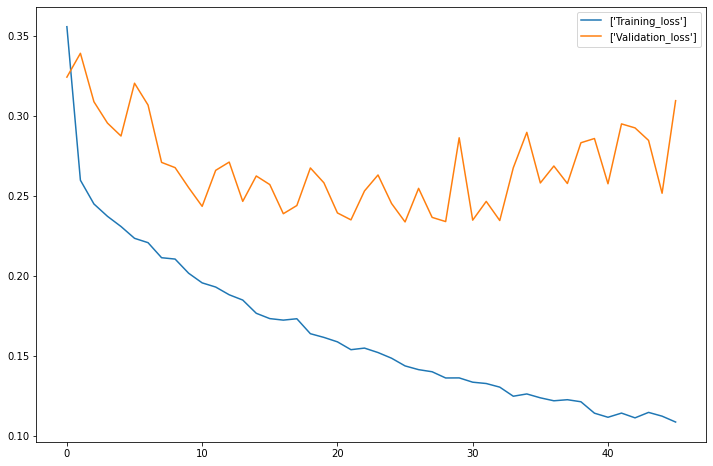

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize =(12,8))

plt.plot(smt_training_history.history['loss'],label = ['Training_loss'])
plt.plot(smt_training_history.history['val_loss'],label = ['Validation_loss'])
plt.legend()
plt.show()

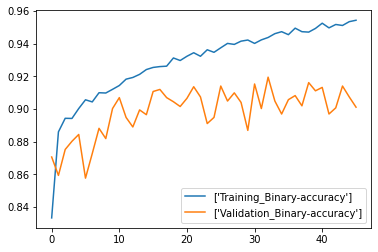

In [102]:
plt.plot(smt_training_history.history['binary_accuracy'],
         label = ['Training_Binary-accuracy'])
plt.plot(smt_training_history.history['val_binary_accuracy'],
         label = ['Validation_Binary-accuracy'])
plt.legend()
plt.show()

In [110]:
y_test_1_pred = (smt_model.predict(X_test_1_scaled)>0.5).astype(int)

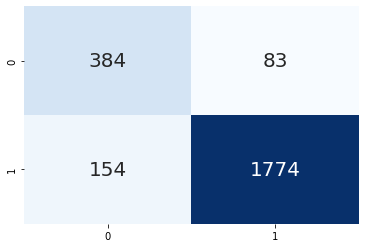

In [111]:
cm=confusion_matrix(y_test_1_arr,y_test_1_pred)
sns.heatmap(cm,annot=True,cmap='Blues',cbar=False,annot_kws={"size": 20},
            fmt='g');

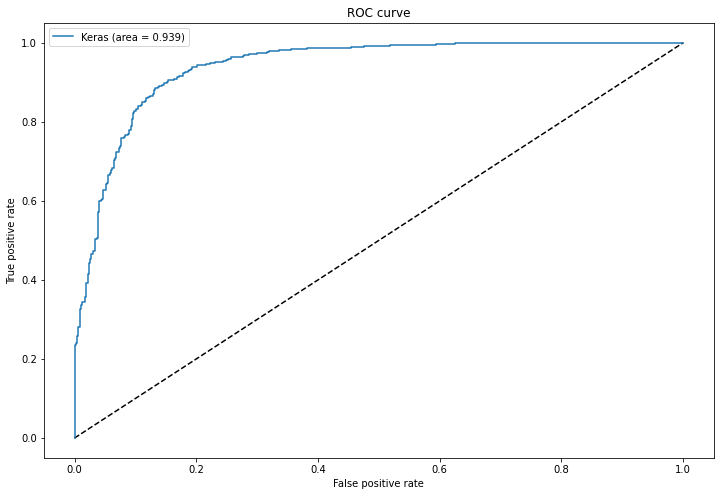

In [113]:
"""plotting area AUC(Area Under Curve) for 
ROC(Reciever Operating Characteristics) curve"""

from sklearn.metrics import roc_curve
y_pred_smt = smt_model.predict(X_test_1_scaled).ravel()
FPR, TPR, threshold = roc_curve(y_test_1_arr, y_pred_smt)

from sklearn.metrics import auc
area_under_curve = auc(FPR, TPR)
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR, TPR, label='Keras (area = {:.3f})'.format(area_under_curve))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

***Inferences:***
1.Both models performed really well with AUC of approx 0.94.
2.Hence both techniques increasing Class_Weights for minority sample and Upsampling the minority class using SMOTE worked really well.
3.Based on requirement end user wrt weightage of FP and FN any of the above model can be chosen.